In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
rent = pd.read_csv(r"C:\Users\aleks\Desktop\Lessons\Week_5\Mid_bootcamp_project\data\clean\cleaned_dataset.csv")
rent.head() #read the new cleaned data

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0000,1965,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,814.9426,1871,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300.0000,2019,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,814.9426,1964,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903.0000,1950,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False


In [4]:
# Round values for total rent

rent['totalrent'] = rent['totalrent'].round().astype(int)
rent


,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840,1965,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,815,1871,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300,2019,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,815,1964,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903,1950,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910,2016,geothermal,False,True,820.0,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False
268789,Hessen,220.00,gas_heating,False,True,1150,1983,gas,True,False,930.0,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False
268790,Hessen,220.00,central_heating,False,True,930,1965,gas,False,True,650.0,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015,2019,gas,False,True,840.0,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False


In [5]:
# Noticed that in the dataset there are some rown in which living space is bigger than total rent which does not makes sense. So I will delete them.

mask = rent['livingspace'] > rent['totalrent']
result = rent[mask]
print(result)

                      regio  servicecharge                     heatingtype   
1119                Sachsen          105.0                 central_heating  \
1883    Nordrhein_Westfalen           75.0            night_storage_heater   
4208                Sachsen          100.0                 central_heating   
5034                Sachsen          100.0                 central_heating   
5738                Sachsen           75.0  self_contained_central_heating   
...                     ...            ...                             ...   
263162              Sachsen          120.0                 central_heating   
266152  Nordrhein_Westfalen           80.0  self_contained_central_heating   
267810  Nordrhein_Westfalen          100.0  self_contained_central_heating   
268010    Baden_Württemberg          350.0                district_heating   
268128              Sachsen          112.0                 central_heating   

        newlyconst  balcony  totalrent  yearconstructed      fi

In [6]:
# Deleting these rows

rentnew = rent.drop(rent[rent['livingspace'] > rent['totalrent']].index)
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840,1965,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,815,1871,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300,2019,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,815,1964,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903,1950,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910,2016,geothermal,False,True,820.0,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False
268789,Hessen,220.00,gas_heating,False,True,1150,1983,gas,True,False,930.0,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False
268790,Hessen,220.00,central_heating,False,True,930,1965,gas,False,True,650.0,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015,2019,gas,False,True,840.0,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False


In [7]:
# Spliting numerical and categorical columns

num_cols = rentnew.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = rentnew.select_dtypes(include=['object']).columns.tolist()

# Create new dataframes for numerical and categorical data
cat_rent = rentnew[cat_cols]
cat_rent

,regio,heatingtype,firingtypes,condition,interiorqual,typeofflat
0,Nordrhein_Westfalen,central_heating,oil,well_kept,normal,ground_floor
1,Rheinland_Pfalz,self_contained_central_heating,gas,refurbished,normal,ground_floor
2,Sachsen,floor_heating,central_heating,first_time_use,sophisticated,apartment
3,Sachsen,district_heating,district_heating,central_heating,central_heating,other
4,Bremen,self_contained_central_heating,gas,refurbished,central_heating,apartment
...,...,...,...,...,...,...
268788,Bayern,heat_pump,geothermal,mint_condition,sophisticated,roof_storey
268789,Hessen,gas_heating,gas,well_kept,sophisticated,apartment
268790,Hessen,central_heating,gas,well_kept,central_heating,apartment
268791,Nordrhein_Westfalen,heat_pump,gas,first_time_use,sophisticated,apartment


In [8]:
num_rent = rentnew[num_cols]
num_rent

,servicecharge,yearconstructed,baserent,livingspace,norooms,floor,numberoffloors
0,245.00,1965,595.0,86.00,4.0,1.000000,3.000000
1,134.00,1871,800.0,89.00,3.0,2.101113,3.518874
2,255.00,2019,965.0,83.80,3.0,3.000000,4.000000
3,58.15,1964,343.0,58.15,3.0,3.000000,3.518874
4,138.00,1950,765.0,84.97,3.0,1.000000,3.518874
...,...,...,...,...,...,...,...
268788,90.00,2016,820.0,90.00,3.0,2.101113,3.518874
268789,220.00,1983,930.0,115.00,3.5,1.000000,1.000000
268790,220.00,1965,650.0,95.00,4.0,1.000000,2.000000
268791,175.00,2019,840.0,70.00,2.0,2.101113,5.000000


In [9]:
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840,1965,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,815,1871,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300,2019,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,815,1964,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903,1950,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910,2016,geothermal,False,True,820.0,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False
268789,Hessen,220.00,gas_heating,False,True,1150,1983,gas,True,False,930.0,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False
268790,Hessen,220.00,central_heating,False,True,930,1965,gas,False,True,650.0,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015,2019,gas,False,True,840.0,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False


In [10]:
# Considering the values where livingspace is less than 150 and number of rows is less than 10. 

rentnew = rent[rent['livingspace'] <= 150]
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840,1965,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,815,1871,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300,2019,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,815,1964,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903,1950,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910,2016,geothermal,False,True,820.0,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False
268789,Hessen,220.00,gas_heating,False,True,1150,1983,gas,True,False,930.0,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False
268790,Hessen,220.00,central_heating,False,True,930,1965,gas,False,True,650.0,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015,2019,gas,False,True,840.0,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False


In [11]:
rentnew = rentnew[rentnew['norooms'] <= 10]
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840,1965,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,815,1871,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300,2019,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,815,1964,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903,1950,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910,2016,geothermal,False,True,820.0,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False
268789,Hessen,220.00,gas_heating,False,True,1150,1983,gas,True,False,930.0,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False
268790,Hessen,220.00,central_heating,False,True,930,1965,gas,False,True,650.0,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015,2019,gas,False,True,840.0,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False


In [12]:
# Analyzing the column regio
print(rentnew['regio'].value_counts())


regio
Nordrhein_Westfalen       61541
Sachsen                   57269
Bayern                    20774
Sachsen_Anhalt            19980
Hessen                    16941
Niedersachsen             16171
Baden_Württemberg         15322
Berlin                     9748
Thüringen                  8309
Rheinland_Pfalz            8064
Brandenburg                6838
Mecklenburg_Vorpommern     6572
Schleswig_Holstein         6562
Hamburg                    3557
Bremen                     2909
Saarland                   1386
Name: count, dtype: int64


In [13]:
# Show a plot of regio.
rentnew['regio'].unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

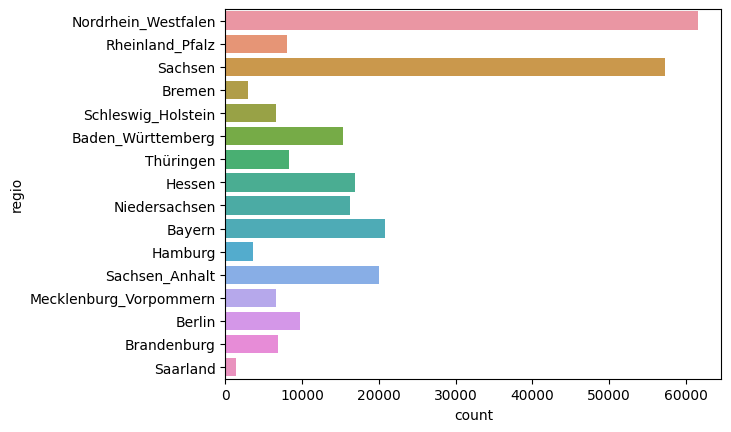

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

rentnew['regio'].value_counts()
sns.countplot(data=rentnew, y="regio")
plt.show()

In [15]:
# Find the average totalrent for each regio.

avg_rent_by_regio = rentnew.groupby('regio')['totalrent'].mean()
print(avg_rent_by_regio)

regio
Baden_Württemberg         1027.341078
Bayern                    1090.043516
Berlin                    1207.138695
Brandenburg                664.626353
Bremen                     763.330354
Hamburg                   1255.080967
Hessen                    1044.042264
Mecklenburg_Vorpommern     586.240870
Niedersachsen              766.136541
Nordrhein_Westfalen        763.655677
Rheinland_Pfalz            818.745164
Saarland                   735.874459
Sachsen                    586.908170
Sachsen_Anhalt             547.227277
Schleswig_Holstein         810.543889
Thüringen                  555.969070
Name: totalrent, dtype: float64


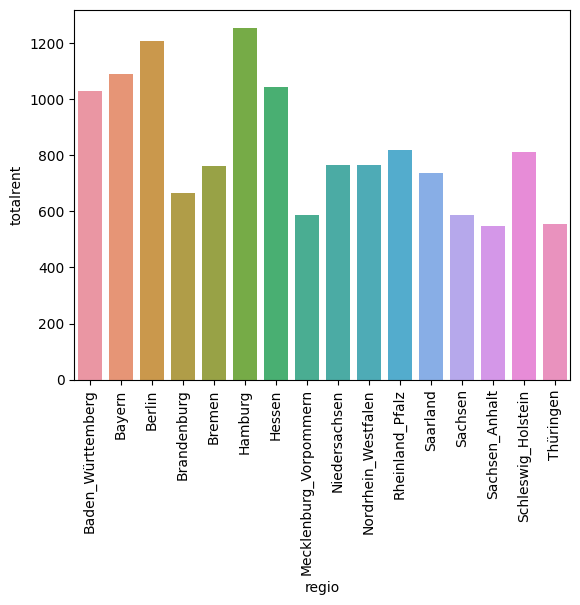

In [16]:
# Presenting the results in a bar chart. 
avg_rent = rentnew.groupby('regio')['totalrent'].mean().reset_index()

sns.barplot(data=avg_rent, x='regio', y='totalrent')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Creating a new column which calculates the price per square meter in order to have a better understanding of prices in different regios.

rentnew['pricesqmt'] = rentnew['totalrent'] / rentnew['livingspace']
rentnew

C:\Users\aleks\AppData\Local\Temp\ipykernel_38572\73604337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentnew['pricesqmt'] = rentnew['totalrent'] / rentnew['livingspace']


,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,...,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden,pricesqmt
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840,1965,oil,False,True,...,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True,9.767442
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,815,1871,gas,False,False,...,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False,9.157303
2,Sachsen,255.00,floor_heating,True,True,1300,2019,central_heating,False,True,...,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False,15.513126
3,Sachsen,58.15,district_heating,False,True,815,1964,district_heating,False,False,...,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False,14.015477
4,Bremen,138.00,self_contained_central_heating,False,True,903,1950,gas,False,False,...,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False,10.627280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910,2016,geothermal,False,True,...,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False,10.111111
268789,Hessen,220.00,gas_heating,False,True,1150,1983,gas,True,False,...,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False,10.000000
268790,Hessen,220.00,central_heating,False,True,930,1965,gas,False,True,...,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True,9.789474
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015,2019,gas,False,True,...,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False,14.500000


In [18]:
rentnew['pricesqmt'].isnull().sum()

5

In [19]:
rentnew = rentnew.dropna(subset=['pricesqmt'])
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,...,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden,pricesqmt
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840,1965,oil,False,True,...,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True,9.767442
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,815,1871,gas,False,False,...,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False,9.157303
2,Sachsen,255.00,floor_heating,True,True,1300,2019,central_heating,False,True,...,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False,15.513126
3,Sachsen,58.15,district_heating,False,True,815,1964,district_heating,False,False,...,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False,14.015477
4,Bremen,138.00,self_contained_central_heating,False,True,903,1950,gas,False,False,...,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False,10.627280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910,2016,geothermal,False,True,...,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False,10.111111
268789,Hessen,220.00,gas_heating,False,True,1150,1983,gas,True,False,...,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False,10.000000
268790,Hessen,220.00,central_heating,False,True,930,1965,gas,False,True,...,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True,9.789474
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015,2019,gas,False,True,...,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False,14.500000


In [20]:
# There are some rows which containt infinite values so I will drop them in order to avoid confusion of the plots.

rentnew = rentnew[~np.isinf(rentnew['pricesqmt'])]
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,...,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden,pricesqmt
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840,1965,oil,False,True,...,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True,9.767442
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,815,1871,gas,False,False,...,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False,9.157303
2,Sachsen,255.00,floor_heating,True,True,1300,2019,central_heating,False,True,...,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False,15.513126
3,Sachsen,58.15,district_heating,False,True,815,1964,district_heating,False,False,...,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False,14.015477
4,Bremen,138.00,self_contained_central_heating,False,True,903,1950,gas,False,False,...,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False,10.627280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910,2016,geothermal,False,True,...,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False,10.111111
268789,Hessen,220.00,gas_heating,False,True,1150,1983,gas,True,False,...,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False,10.000000
268790,Hessen,220.00,central_heating,False,True,930,1965,gas,False,True,...,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True,9.789474
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015,2019,gas,False,True,...,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False,14.500000


In [21]:
# Comparing the price per square meter in different regions. 

rentnew.loc[rentnew['regio'] == 'Baden_Württemberg', 'pricesqmt'].mean()

14.376222184936058

In [22]:
rentnew.loc[rentnew['regio'] == 'Bayern', 'pricesqmt'].mean()

15.736143183772786

In [23]:
rentnew.loc[rentnew['regio'] == 'Berlin', 'pricesqmt'].mean()

17.07613670031533

In [24]:
rentnew.loc[rentnew['regio'] == 'Brandenburg', 'pricesqmt'].mean()

10.114441352449584

In [25]:
rentnew.loc[rentnew['regio'] == 'Bremen', 'pricesqmt'].mean()

11.089061129405025

In [26]:
rentnew.loc[rentnew['regio'] == 'Hamburg', 'pricesqmt'].mean()

16.731841218296726

In [27]:
rentnew.loc[rentnew['regio'] == 'Hessen', 'pricesqmt'].mean()

14.851504671516896

In [28]:
rentnew.loc[rentnew['regio'] == 'Mecklenburg_Vorpommern', 'pricesqmt'].mean()

9.597818977246302

In [29]:
rentnew.loc[rentnew['regio'] == 'Niedersachsen', 'pricesqmt'].mean()

11.08529568928864

In [30]:
rentnew.loc[rentnew['regio'] == 'Nordrhein_Westfalen', 'pricesqmt'].mean()

11.036244124455369

In [31]:
rentnew.loc[rentnew['regio'] == 'Rheinland_Pfalz', 'pricesqmt'].mean()

11.584099662222119

In [32]:
rentnew.loc[rentnew['regio'] == 'Saarland', 'pricesqmt'].mean()

10.285403334328523

In [33]:
rentnew.loc[rentnew['regio'] == 'Sachsen', 'pricesqmt'].mean()

9.154740595407898

In [34]:
rentnew.loc[rentnew['regio'] == 'Sachsen_Anhalt', 'pricesqmt'].mean()

9.061588229667882

In [35]:
rentnew.loc[rentnew['regio'] == 'Schleswig_Holstein', 'pricesqmt'].mean()

11.521725673718995

In [36]:
rentnew.loc[rentnew['regio'] == 'Thüringen', 'pricesqmt'].mean()

9.042684370953157

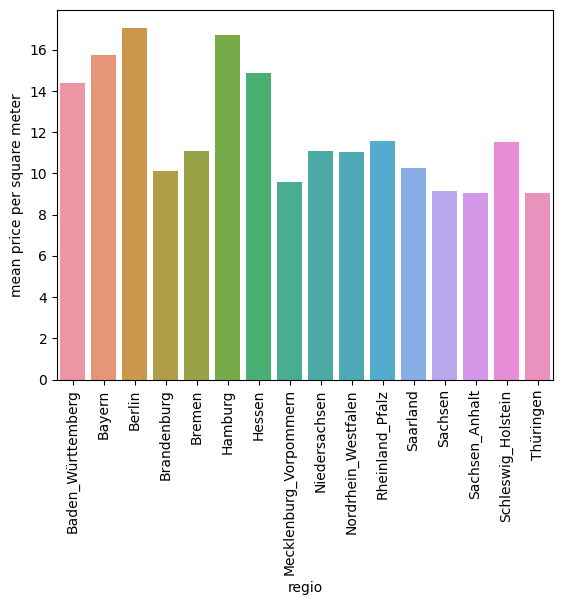

In [37]:
# Creating a plot to visualise the results. 

mean_pricesqmt = rentnew.groupby('regio')['pricesqmt'].mean()

# create bar plot using seaborn
sns.barplot(x=mean_pricesqmt.index, y=mean_pricesqmt.values)
plt.xticks(rotation=90)
plt.xlabel('regio')
plt.ylabel('mean price per square meter')
plt.show()

In [38]:
# identify continuous variables
continuous_vars = [col for col in rentnew.columns if rentnew[col].dtype in ['int64', 'float64']]
print('Continuous variables:', continuous_vars)

# identify discrete variables
discrete_vars = [col for col in rentnew.columns if col not in continuous_vars]
print('Discrete variables:', discrete_vars)

Continuous variables: ['servicecharge', 'yearconstructed', 'baserent', 'livingspace', 'norooms', 'floor', 'numberoffloors', 'pricesqmt']
Discrete variables: ['regio', 'heatingtype', 'newlyconst', 'balcony', 'totalrent', 'firingtypes', 'haskitchen', 'cellar', 'condition', 'interiorqual', 'lift', 'typeofflat', 'garden']


In [39]:
# Calculate the correlation between total rent and base rent. 

corr = rentnew['totalrent'].corr(rentnew['baserent'])
print("Correlation coefficient:", corr)  # Since the correlation coefficient is close to 1, it indicates a strong positive linear relationship between the two variables

Correlation coefficient: 0.8015210653689213


Text(0.5, 1.0, 'Scatter Plot of Total Rent vs. Base Rent with Regression Line')

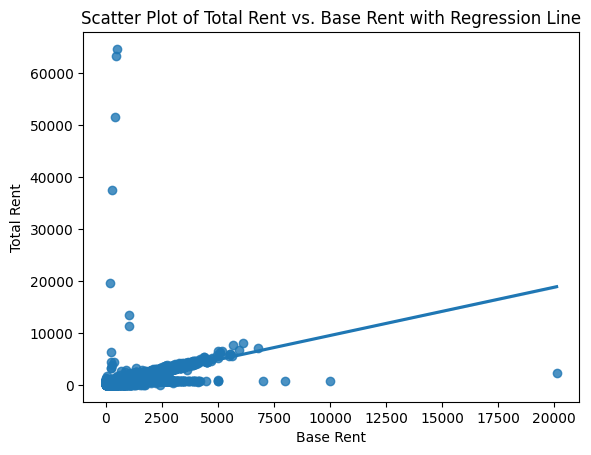

In [40]:
sns.regplot(data=rentnew, x='baserent', y='totalrent')

# set the axis labels and title
plt.xlabel('Base Rent')
plt.ylabel('Total Rent')
plt.title('Scatter Plot of Total Rent vs. Base Rent with Regression Line')

# From the scatter plot we can see that total rent and base rent are highly correlated. 

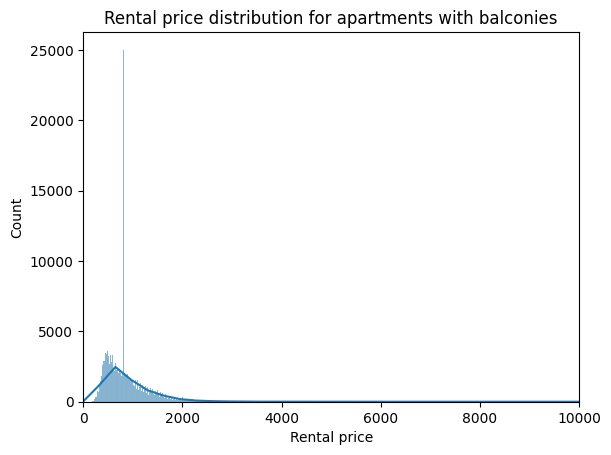

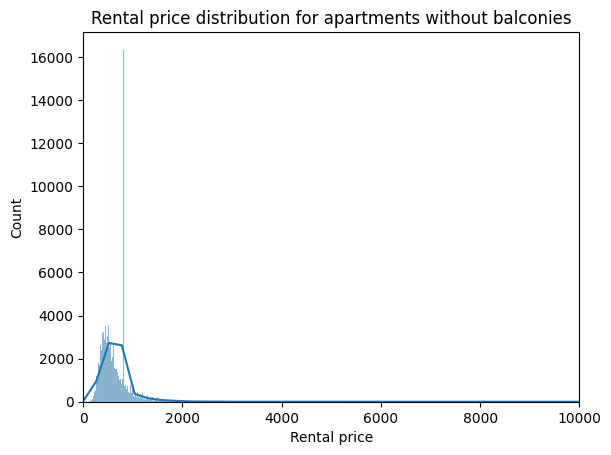

In [41]:
# Rental price distribution for apartments with balconies
sns.histplot(rentnew[rentnew['balcony'] == True]['totalrent'], kde=True)
plt.title('Rental price distribution for apartments with balconies')
plt.xlabel('Rental price')
plt.xlim(0, 10000)
plt.show()

# Rental price distribution for apartments without balconies
sns.histplot(rentnew[rentnew['balcony'] == False]['totalrent'], kde=True)
plt.title('Rental price distribution for apartments without balconies')
plt.xlabel('Rental price')
plt.xlim(0, 10000)
plt.show()

# S

In [42]:
unique_norooms = rentnew['norooms'].unique()
print(unique_norooms)

[ 4.    3.    2.    2.5   1.    5.    1.5   3.5   4.5   5.5   6.    7.
  2.1   2.2   3.1   8.    1.2   6.5   3.01  9.    1.1   3.8   3.4  10.
  2.01  2.9   7.5   4.2   1.3   2.65  2.3   2.7   1.25]


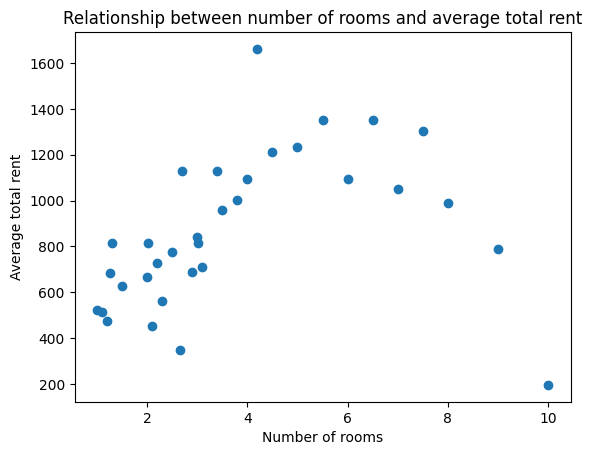

In [43]:
avg_total_rent = rentnew.groupby('norooms')['totalrent'].mean()

# create a scatter plot
plt.scatter(avg_total_rent.index, avg_total_rent.values)
plt.xlabel('Number of rooms')
plt.ylabel('Average total rent')
plt.title('Relationship between number of rooms and average total rent')
plt.show()

# As the number of rooms increases, the average total rent also tends to increase. There is a clear positive correlation between the number of rooms and the average total rent. This suggests that apartments with more rooms tend to be more expensive. However, there is some variation in the data, with some apartments having higher or lower rents than expected based on the number of rooms.